In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Step 1 — Load Cleaned Dataset
# --------------------------
print("Loading cleaned dataset...")
data = pd.read_csv('../data/cleaned_loan_data.csv')
print("Dataset shape:", data.shape)
print(data.head())

Loading cleaned dataset...
Dataset shape: (112996, 180)
      id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
0  84534        NaN    10000.0      10000.0          10000.0      6.49   
1  84253        NaN     1400.0       1400.0           1400.0     12.88   
2  84533        NaN    25000.0      25000.0          25000.0      7.49   
3  84552        NaN    20000.0      20000.0          20000.0     15.77   
4  84860        NaN    14650.0      14650.0          14650.0     20.50   

   installment  sub_grade  emp_title  emp_length  ...  hardship_status_BROKEN  \
0       306.45          1      30357           6  ...                   False   
1        47.10         11      20451           3  ...                   False   
2       777.55          3      30896           1  ...                   False   
3       700.88         15       7196           5  ...                   False   
4       392.23         23      32451           2  ...                   False   

   hardship_

In [3]:
# Step 2 — General Info
# --------------------------
print("\nDataset Info:")
print(data.info())

print("\nMissing Values (%):")
missing_percentage = data.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112996 entries, 0 to 112995
Columns: 180 entries, id to settlement_status_COMPLETE
dtypes: bool(46), float64(113), int64(21)
memory usage: 120.5 MB
None

Missing Values (%):
member_id    100.0
dtype: float64


In [4]:
# Step 3 — Basic Statistics
# --------------------------
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
                  id  member_id      loan_amnt    funded_amnt  \
count  112996.000000        0.0  112996.000000  112996.000000   
mean    56497.500000        NaN   15032.887226   15026.401820   
std     32619.279846        NaN    9180.062792    9177.889897   
min         0.000000        NaN    1000.000000    1000.000000   
25%     28248.750000        NaN    8000.000000    8000.000000   
50%     56497.500000        NaN   12875.000000   12825.000000   
75%     84746.250000        NaN   20000.000000   20000.000000   
max    112995.000000        NaN   40000.000000   40000.000000   

       funded_amnt_inv       int_rate    installment      sub_grade  \
count    112996.000000  112996.000000  112996.000000  112996.000000   
mean      15007.074533      13.100463     445.106222      10.292240   
std        9182.539858       4.842966     266.352896       6.312874   
min           0.000000       5.310000      22.790000       0.000000   
25%        8000.000000       9.490000   

In [7]:
# Step 4 — Visualization with Seaborn
# --------------------------

# Loan Status Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=data)
plt.title("Loan Status Distribution")
plt.show()

# Loan Amount Distribution
plt.figure(figsize=(6,4))
sns.histplot(data['loan_amnt'], bins=50, kde=True)
plt.title("Loan Amount Distribution")
plt.show()

# Loan Status vs Loan Amount
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title("Loan Amount by Loan Status")
plt.show()

# Interest Rate vs Loan Status
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='int_rate', data=data)
plt.title("Interest Rate by Loan Status")
plt.show()




ValueError: Could not interpret value `loan_status` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [8]:
print("Columns in cleaned dataset:")
print(data.columns)


Columns in cleaned dataset:
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'hardship_status_BROKEN', 'hardship_status_COMPLETED',
       'hardship_loan_status_In Grace Period', 'hardship_loan_status_Issued',
       'hardship_loan_status_Late (16-30 days)',
       'hardship_loan_status_Late (31-120 days)',
       'disbursement_method_DirectPay', 'debt_settlement_flag_Y',
       'settlement_status_BROKEN', 'settlement_status_COMPLETE'],
      dtype='object', length=180)


In [9]:
loan_status_cols = [col for col in data.columns if 'loan_status' in col]
print(loan_status_cols)


['loan_status_Current', 'loan_status_Default', 'loan_status_Does not meet the credit policy. Status:Charged Off', 'loan_status_Does not meet the credit policy. Status:Fully Paid', 'loan_status_Fully Paid', 'loan_status_In Grace Period', 'loan_status_Late (16-30 days)', 'loan_status_Late (31-120 days)', 'hardship_loan_status_In Grace Period', 'hardship_loan_status_Issued', 'hardship_loan_status_Late (16-30 days)', 'hardship_loan_status_Late (31-120 days)']


In [10]:
# Reconstruct loan_status from one-hot columns
loan_status_cols = [
    'loan_status_Current', 
    'loan_status_Default', 
    'loan_status_Does not meet the credit policy. Status:Charged Off', 
    'loan_status_Does not meet the credit policy. Status:Fully Paid', 
    'loan_status_Fully Paid', 
    'loan_status_In Grace Period', 
    'loan_status_Late (16-30 days)', 
    'loan_status_Late (31-120 days)'
]

# Create a single column for loan_status
data['loan_status'] = data[loan_status_cols].idxmax(axis=1)

# Clean column values
data['loan_status'] = data['loan_status'].str.replace("loan_status_", "")

print(data['loan_status'].value_counts())


loan_status
Current                                                57513
Fully Paid                                             53648
Late (31-120 days)                                      1084
In Grace Period                                          416
Late (16-30 days)                                        202
Does not meet the credit policy. Status:Fully Paid        94
Does not meet the credit policy. Status:Charged Off       37
Default                                                    2
Name: count, dtype: int64


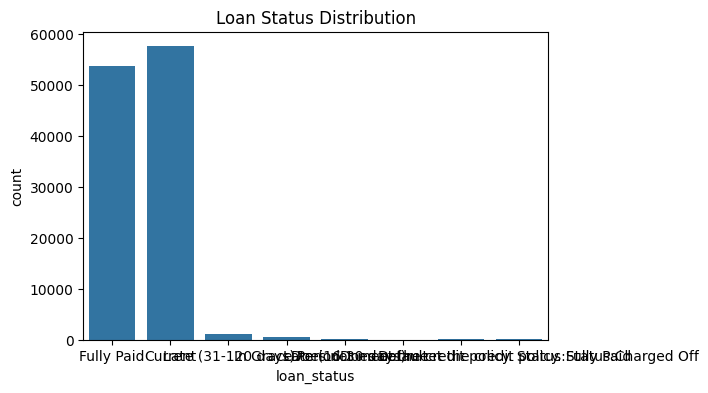

In [11]:
# Loan Status Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=data)
plt.title("Loan Status Distribution")
plt.show()


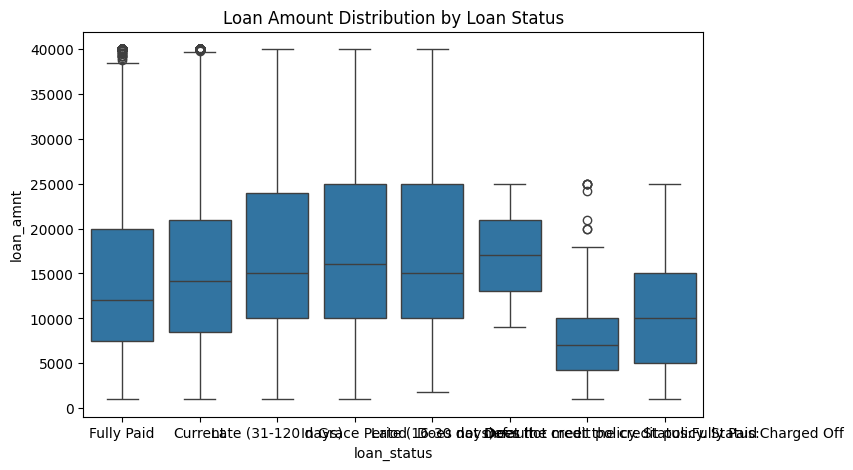

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title("Loan Amount Distribution by Loan Status")
plt.show()


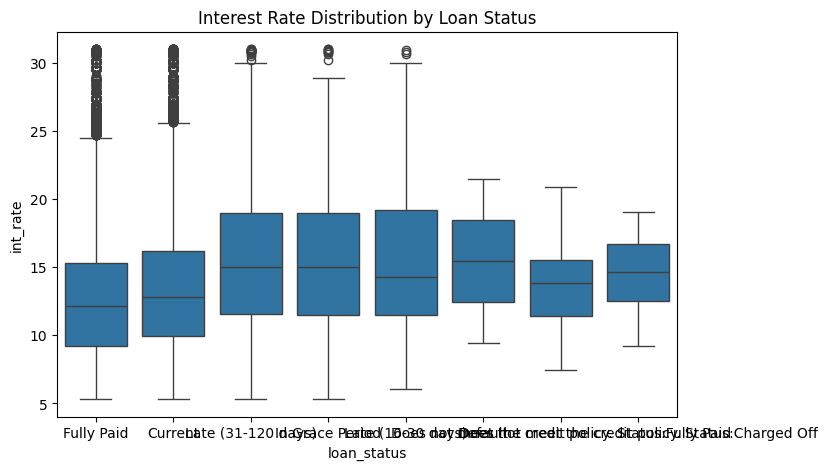

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='int_rate', data=data)
plt.title("Interest Rate Distribution by Loan Status")
plt.show()


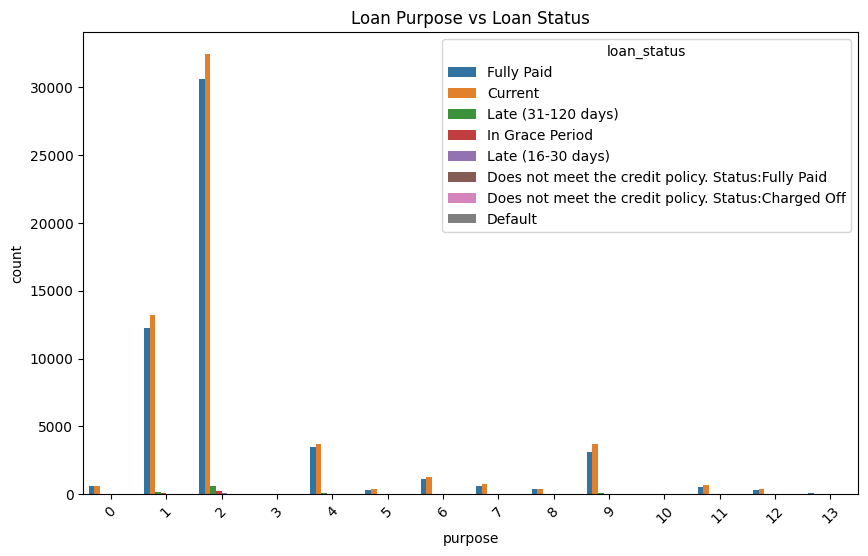

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', hue='loan_status', data=data)
plt.title("Loan Purpose vs Loan Status")
plt.xticks(rotation=45)
plt.show()


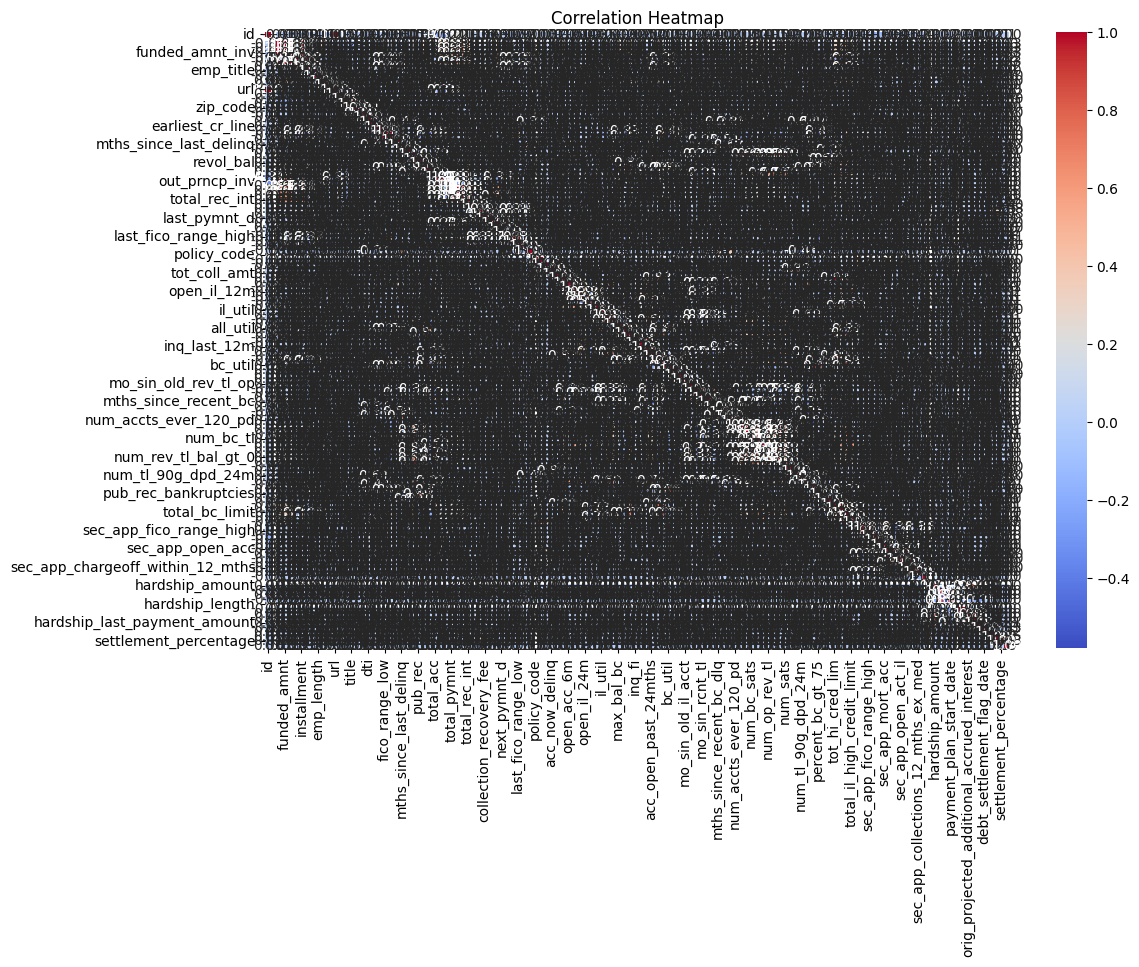

In [15]:
plt.figure(figsize=(12,8))
corr = data.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


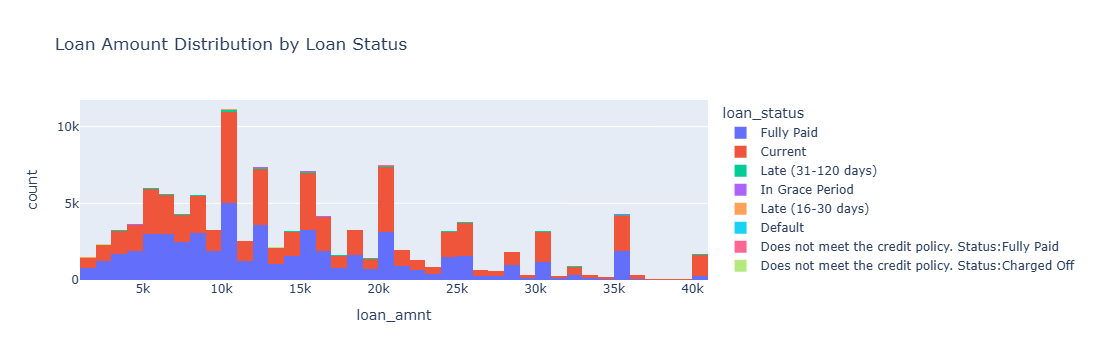

In [16]:
import plotly.express as px

fig = px.histogram(data, x="loan_amnt", color="loan_status", nbins=50, title="Loan Amount Distribution by Loan Status")
fig.show()
